In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import scipy.cluster.hierarchy as clust

These are the symptoms that we are most interested in.

In [3]:
symptoms_dataset = pd.read_csv('Example/Inputs/example_dataset_1.csv')

In [4]:
symptom_list = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G',
    'H',
    'I',
    'J'
]

Get just the symptom columns and transpose the data

In [5]:
symptoms_transposed = symptoms_dataset[symptom_list].transpose()

Convert strings to booleans for use when computing Jaccard

In [6]:
symptoms_transposed.replace({
    1: True,
    0: False
}, inplace = True)

Compute a Jaccard distance matrix

In [7]:
%%time
distance_matrix = sci.spatial.distance.pdist(X = symptoms_transposed, metric = 'jaccard')

Wall time: 1.02 ms


Convert the matrix into squareform (instead of the weird lower tringular things we don't use), label and output

In [9]:
dist_matrix_jaccard = sci.spatial.distance.squareform(distance_matrix)
df_jaccard = pd.DataFrame(dist_matrix_jaccard, index = symptom_list, columns = symptom_list)
df_jaccard.to_csv("Example/Outputs/DistanceMatrixJaccard.csv")

In [10]:
labels_list = list(symptoms_transposed.index.values)

# Dendrogram plotting

Using the linkage function, scipy only lets you use ward linkage with Euclidean distances. The following code function WILL let you. This appears to be well justified in practice, and there are some simulation papers where this has been justified using Monte Carlo simulation.

Overall, while I do believe that Ward linkage will output an good clustering, I steer away from it in practice due to methodological reasons.

In [11]:
def make_dendrogram(data, method, metric):
    
    distance_matrix = sci.spatial.distance.pdist(X = data, metric = metric)

    linked = clust.linkage(y = distance_matrix,
                       method = 'ward',
                       optimal_ordering = True)

    plt.figure(figsize = (12, 8))
    clust.dendrogram(linked, orientation = 'top', labels = labels_list)
    plt.xticks(rotation = 90)
    plt.title(f'Heirarchal clustering (linkage = {method}, distance = {metric})')
    plt.show()

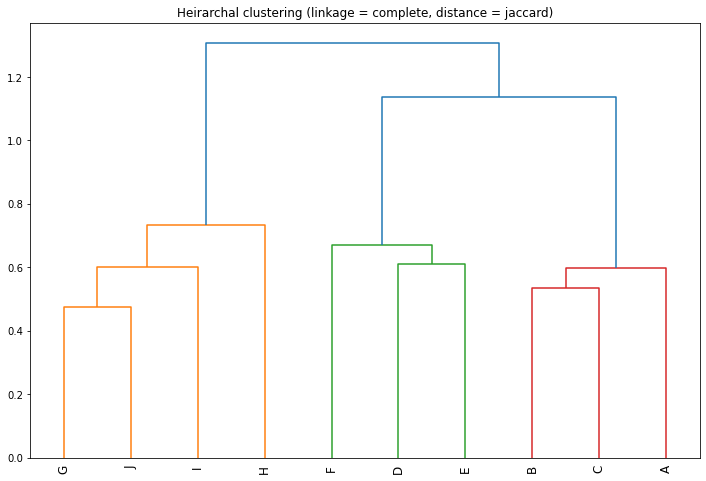

In [12]:
make_dendrogram(data = symptoms_transposed, method = 'complete', metric = 'jaccard')